# Analyzing Best Selling Books - Data Visualization Portfolio Project

This project focuses on analyzing the data of the top 100 most popular books based on global sales through a series of visualizations. We'll look to identify patterns and insights on authors, genres, publisher trends, and consumer behavior.

#### Questions
We will be working with a list of world best-selling books that focuses on their sales volume and realted details  to answer the following questions:
- Which publishers have the most books on the list?
- What are the most popular genres?
- Do some genres tend to sell more copies on average than others?
- Is there a correlation between the number of best-selling books and author has and their total sales?

## Import Libraries

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

## Load and Inspect Data

The dataset containing the list of best-selling books is located in the 'datasets' folder.

Let's load and inspect the data of the top 100 best-selling books.

In [2]:
books = pd.read_csv('datasets/best_selling_books.csv')

In [3]:
books.head()

,Rank,Title,Author,Volume Sales,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Title         100 non-null    object
 2   Author        100 non-null    object
 3   Volume Sales  100 non-null    object
 4   Publisher     100 non-null    object
 5   Genre         100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [6]:
books.describe(include = 'all')

,Rank,Title,Author,Volume Sales,Publisher,Genre
count,100.000000,100,100,100,100,100
unique,NaN,100,67,100,16,21
top,NaN,"Da Vinci Code,The","Rowling, J.K.","5,094,805",Random House,General & Literary Fiction
freq,NaN,1,9,1,19,33
mean,50.500000,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,NaN,NaN


In [8]:
books.Genre.unique()

array(['Crime, Thriller & Adventure', "Children's Fiction",
       'Romance & Sagas', 'Young Adult Fiction',
       'General & Literary Fiction', 'Popular Science', 'Picture Books',
       'Food & Drink: General', 'Humour: Collections & General',
       'Autobiography: General', 'Biography: The Arts',
       'Science Fiction & Fantasy', 'Fitness & Diet',
       'Usage & Writing Guides',
       'Popular Culture & Media: General Interest',
       'Autobiography: The Arts', 'Current Affairs & Issues',
       'Travel Writing', 'National & Regional Cuisine',
       "Children's Annuals", 'Biography: General'], dtype=object)

In [9]:
books.Publisher.unique()

array(['Transworld', 'Bloomsbury', 'Random House', 'Little, Brown Book',
       'Quercus', 'Pan Macmillan', 'Penguin', 'Hodder & Stoughton',
       'Canongate', 'HarperCollins', 'Orion', 'Scholastic Ltd.',
       'Headline', 'Profile Books Group',
       'Random House Childrens Books G', 'D.C. Thomson'], dtype=object)

Initial Observations:
- The data includes the name of the book, the author, the publisher, the genre, total number of sales and it's rank in the top 100 list.
- The `Volume Sales` column is currently of type `object` when it should be of type `int`.
- There are 21 unique `Genre` categories, which can be reduced down to broader groups to help with analysis.
- There are a handful of publishers listed that are owned by the same parent company.

## Data Cleaning & Preparation

Before we begin to answer our questions on the data, we will need to clean and prepare the dataset in order to effectively analyze and visualize the data.

Here are some updates we will be making:
- Replace any space characters in the column names with an underscore and lowercase all characters to provide easier access to columns.
- Change the data type of the `Volume Sales` column from `object` to `int`.
- Create an additional column named `general_genre`, which will to reduce the number of unique genre categories into broader groups. This will allow for easier trend analysis while maintaining meaningful distinctions.
- Create an additional column named `parent_company`, which will group together publishers that are owned by the same company and list them as `Independent` if there is no parent company.
- Create a new column that includes an abbreviated version of the publishers name to make it more concise for use in our visualizations.

In [13]:
# Replace spaces with underscore and lowercase all characters in column names
books.columns = books.columns.str.replace(' ', '_').str.lower()
books.columns

Index(['rank', 'title', 'author', 'volume_sales', 'publisher', 'genre'], dtype='object')

In [14]:
# Change data type of 'volume_sales' from 'object' to 'int'
books.volume_sales = books.volume_sales.str.replace(',', '').astype('int')
books.volume_sales.head()

0    5094805
1    4475152
2    4200654
3    4179479
4    3758936
Name: volume_sales, dtype: int64

In [19]:
# Create broader genre groups through mapping

# Define the genre mapping
genre_mapping = {
    'Crime, Thriller & Adventure': 'Thriller & Mystery',
    'Science Fiction & Fantasy': 'Science Fiction & Fantasy',
    "Children's Fiction": "Children's Books",
    'Picture Books': "Children's Books",
    "Children's Annuals": "Children's Books",
    'Young Adult Fiction': 'Young Adult',
    'Romance & Sagas': 'Romance',
    'General & Literary Fiction': 'Fiction',
    'Popular Science': 'Non-Fiction',
    'Travel Writing': 'Non-Fiction',
    'Current Affairs & Issues': 'Non-Fiction',
    'Popular Culture & Media: General Interest': 'Non-Fiction',
    'Autobiography: General': 'Biography & Memoir',
    'Biography: The Arts': 'Biography & Memoir',
    'Autobiography: The Arts': 'Biography & Memoir',
    'Biography: General': 'Biography & Memoir',
    'Humour: Collections & General': 'Lifestyle & Entertainment',
    'Food & Drink: General': 'Lifestyle & Entertainment',
    'National & Regional Cuisine': 'Lifestyle & Entertainment',
    'Fitness & Diet': 'Lifestyle & Entertainment',
    'Usage & Writing Guides': 'Lifestyle & Entertainment'
}

# Map the original genres to the list of general genres
books['general_genre'] = books.genre.map(genre_mapping)
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance


In [21]:
# Create a column based on parent company through mapping

# Define the publisher mapping
parent_company_mapping = {
    'Transworld': 'Penguin Random House',
    'Random House': 'Penguin Random House',
    'Random House Childrens Books G': 'Penguin Random House',
    'Penguin': 'Penguin Random House',
    
    'Little, Brown Book': 'Hachette Livre',
    'Hodder & Stoughton': 'Hachette Livre',
    'Orion': 'Hachette Livre',
    'Headline': 'Hachette Livre',
    'Quercus': 'Hachette Livre',
    
    'Pan Macmillan': 'Holtzbrinck Publishing Group',
    
    'HarperCollins': 'News Corp',
    
    'Scholastic Ltd.': 'Scholastic Corporation',
    
    'Bloomsbury': 'Independent',
    'Canongate': 'Independent',
    'Profile Books Group': 'Independent',
    'D.C. Thomson': 'Independent'
}

# Map the publisher to the list of parent companies
books['parent_company'] = books.publisher.map(parent_company_mapping)
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery,Penguin Random House
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books,Independent
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books,Independent
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books,Independent
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance,Penguin Random House


In [109]:
# Create a column to abbreviate long publisher names
# Define mapping of original publisher names to their abbreviations
publisher_abbreviations = {
    'Little, Brown Book': 'Little Brown',
    'Hodder & Stoughton': 'Hodder',
    'Scholastic Ltd.': 'Scholastic',
    'Profile Books Group': 'Profile Books',
    'Random House Childrens Books G': 'Random House Kids'
}

# Replace the publisher names with with abbreviations
books['publisher_abrev'] = books.publisher.replace(publisher_abbreviations)
books.publisher_abrev.unique()

array(['Transworld', 'Bloomsbury', 'Random House', 'Little Brown',
       'Quercus', 'Pan Macmillan', 'Penguin', 'Hodder', 'Canongate',
       'HarperCollins', 'Orion', 'Scholastic', 'Headline',
       'Profile Books', 'Random House Kids', 'D.C. Thomson'], dtype=object)

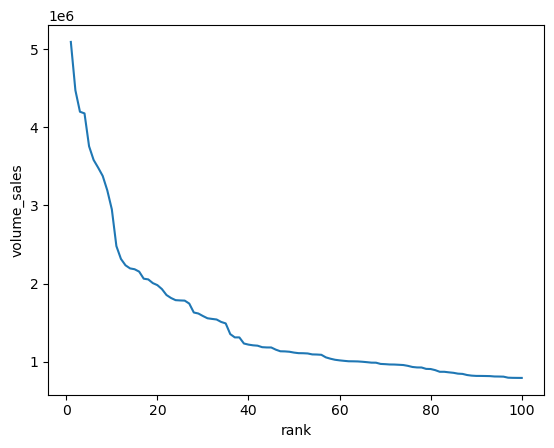

In [22]:
sns.lineplot(data = books, x = 'rank', y = 'volume_sales')
plt.show()

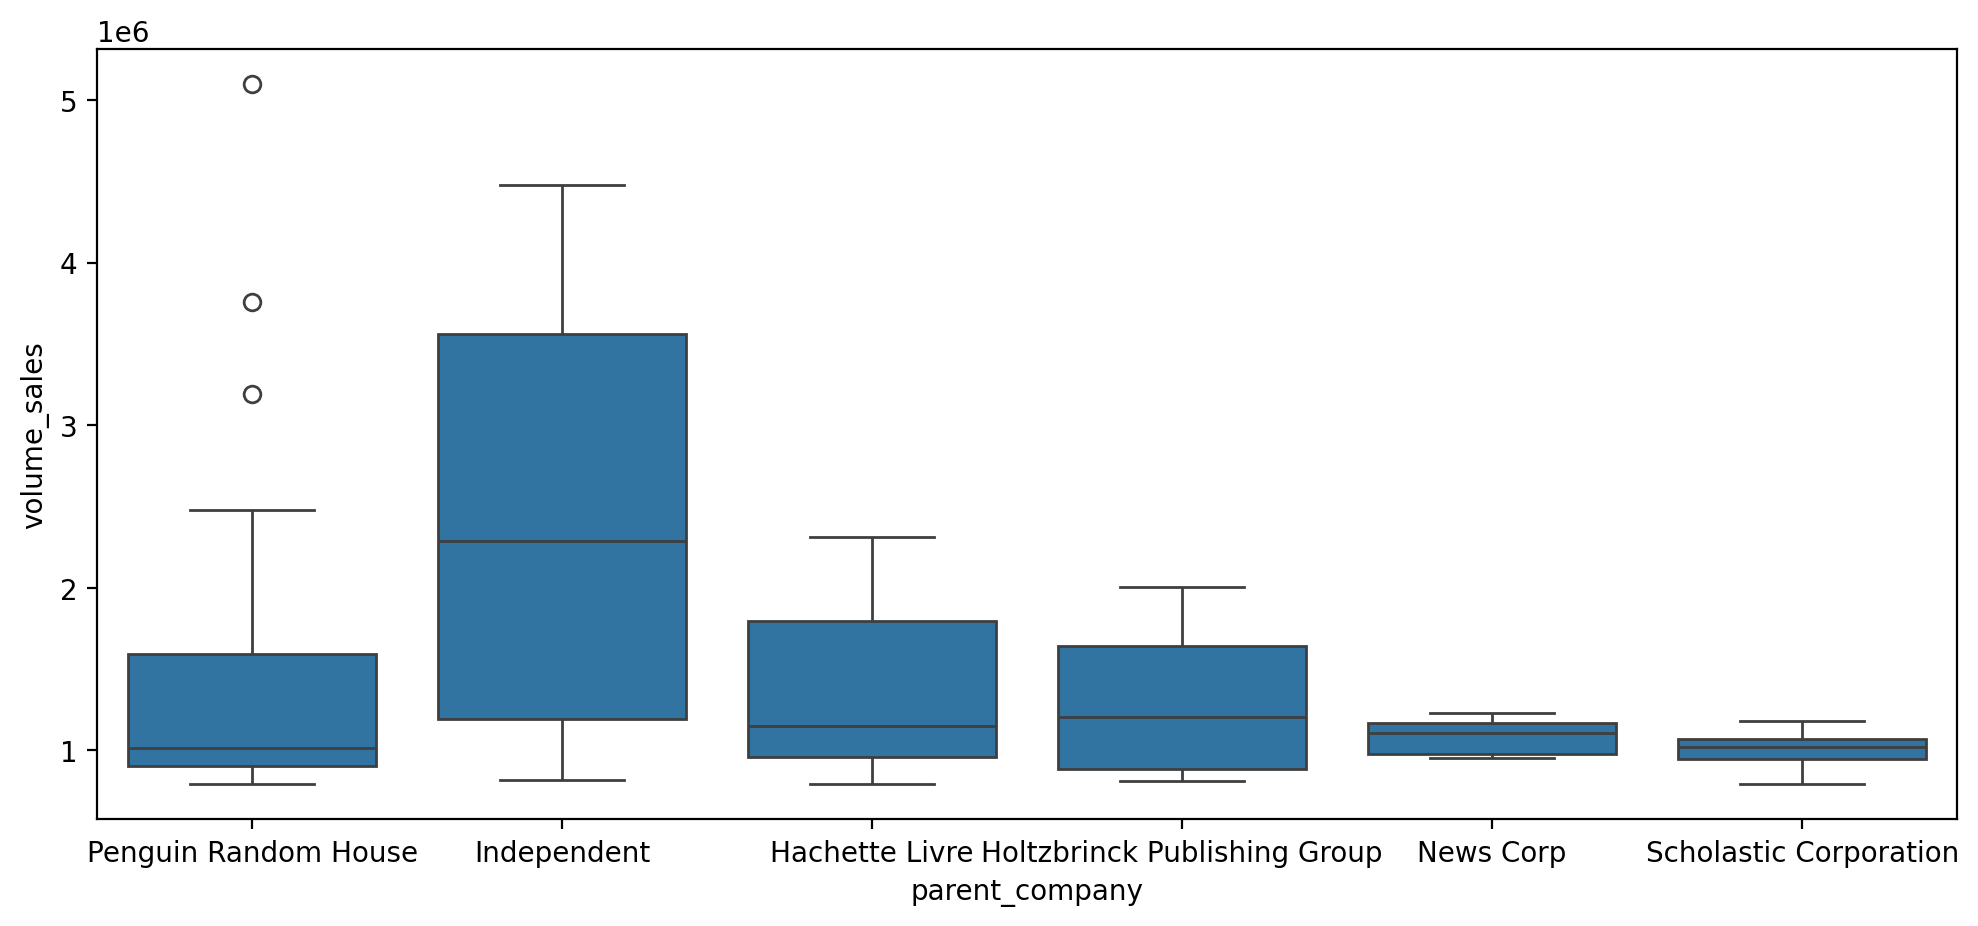

In [25]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(data = books, x = 'parent_company', y = 'volume_sales')
plt.show()

## Data Visualizations

In [90]:
# Dark blue, brown, gold, silver, gray
classic_palette = ['#2E3B4E', '#B86B52', '#D9A84C', '#F0E5D8', '#6B7A8F']

### Which publishers have the most books on the list?

To answer this question, we can visualize the number of books by each publisher through the use of a bar graph.

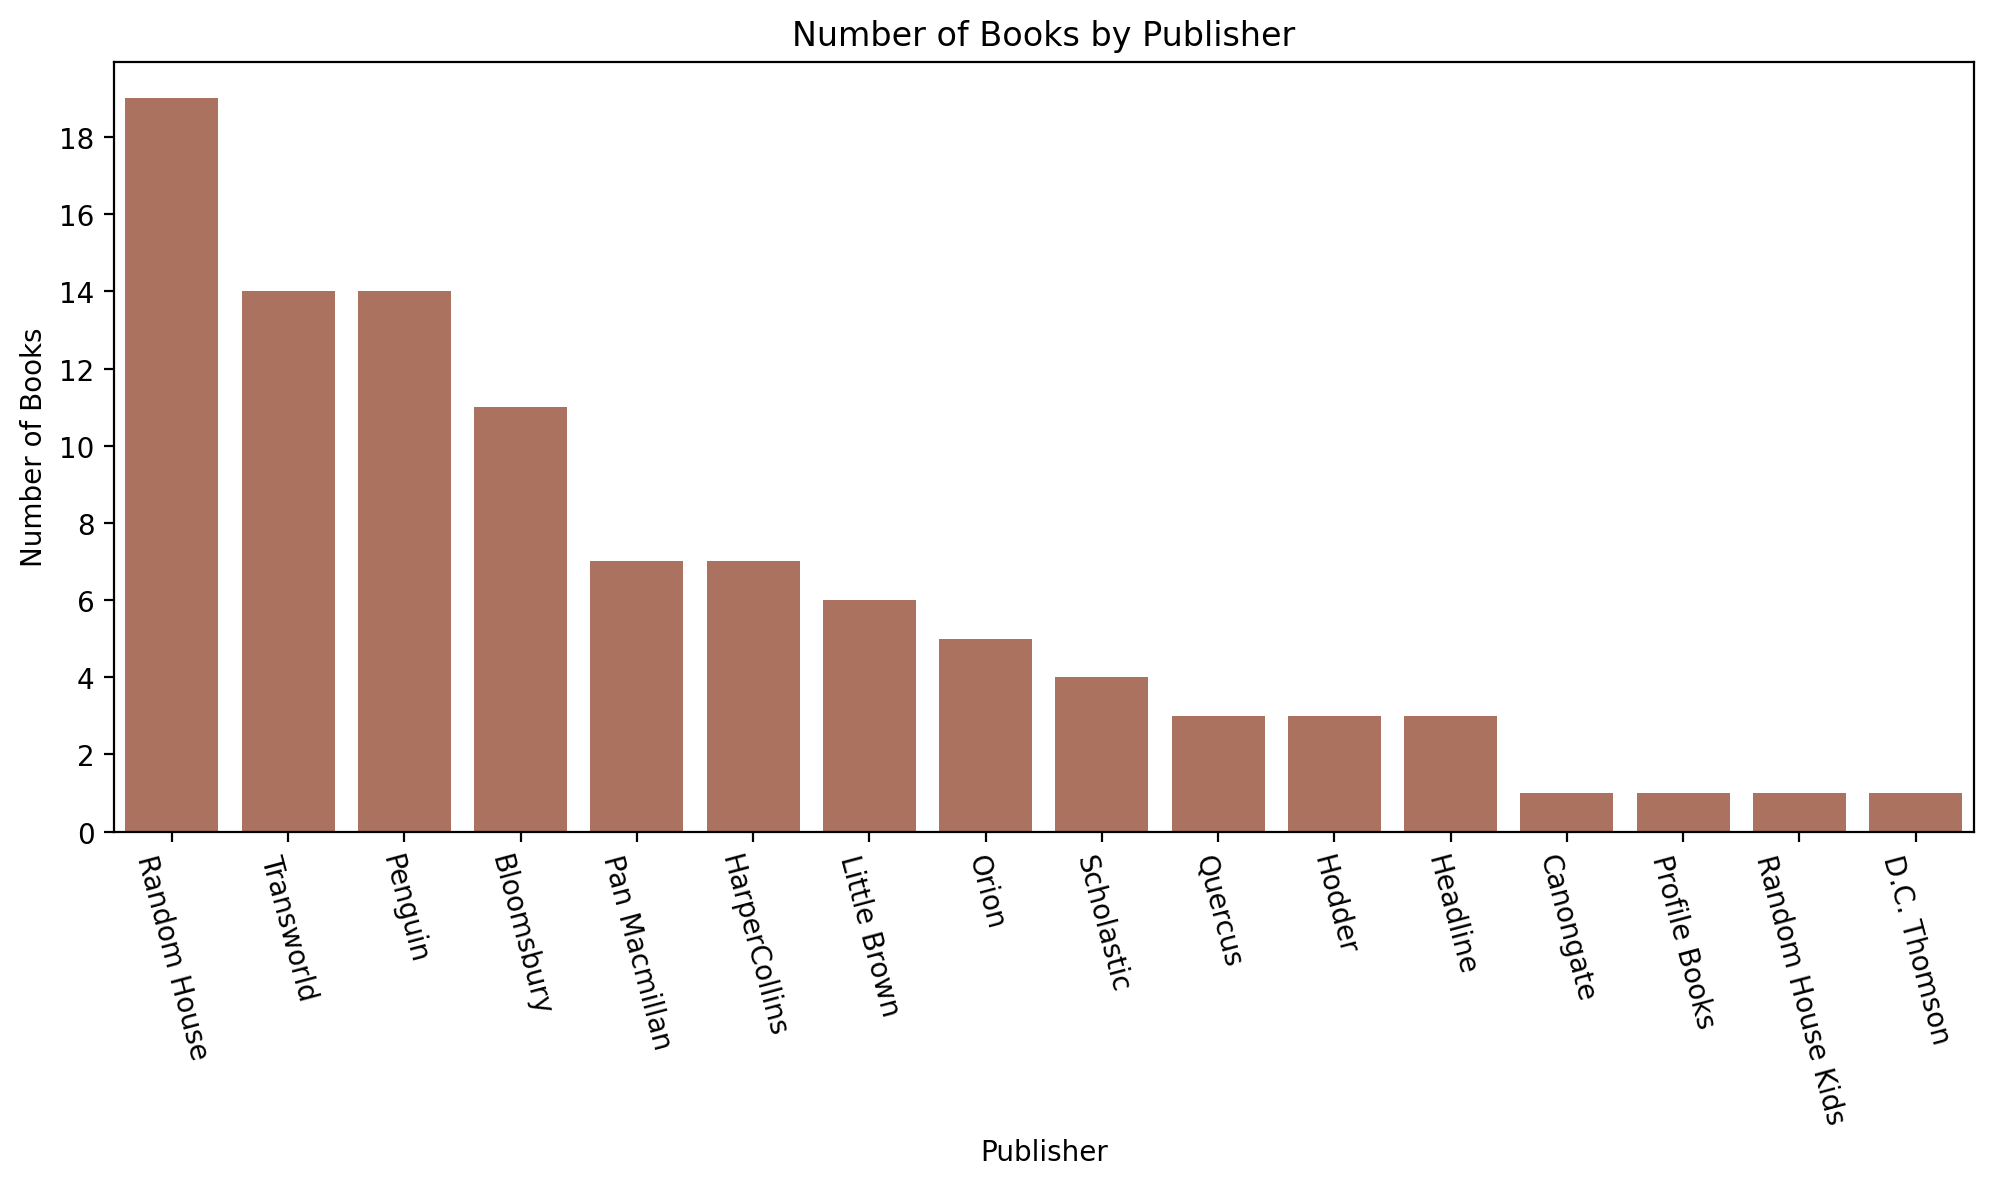

In [119]:
plt.figure(figsize = (12,5), dpi = 200)
sns.set_palette(classic_palette)

# Get the number of books by each publishers
publisher_counts = books.publisher_abrev.value_counts().sort_values(ascending = False).reset_index()
publisher_counts.columns = ['publisher', 'num_of_books']

# Plot bar graph with the number of books each publisher has in top 100
axbar = sns.barplot(data = publisher_counts, x = 'publisher', y = 'num_of_books', color = classic_palette[1])
axbar.set(title = 'Number of Books by Publisher', xlabel = 'Publisher', ylabel = 'Number of Books')
plt.xticks(rotation = -75)
axbar.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

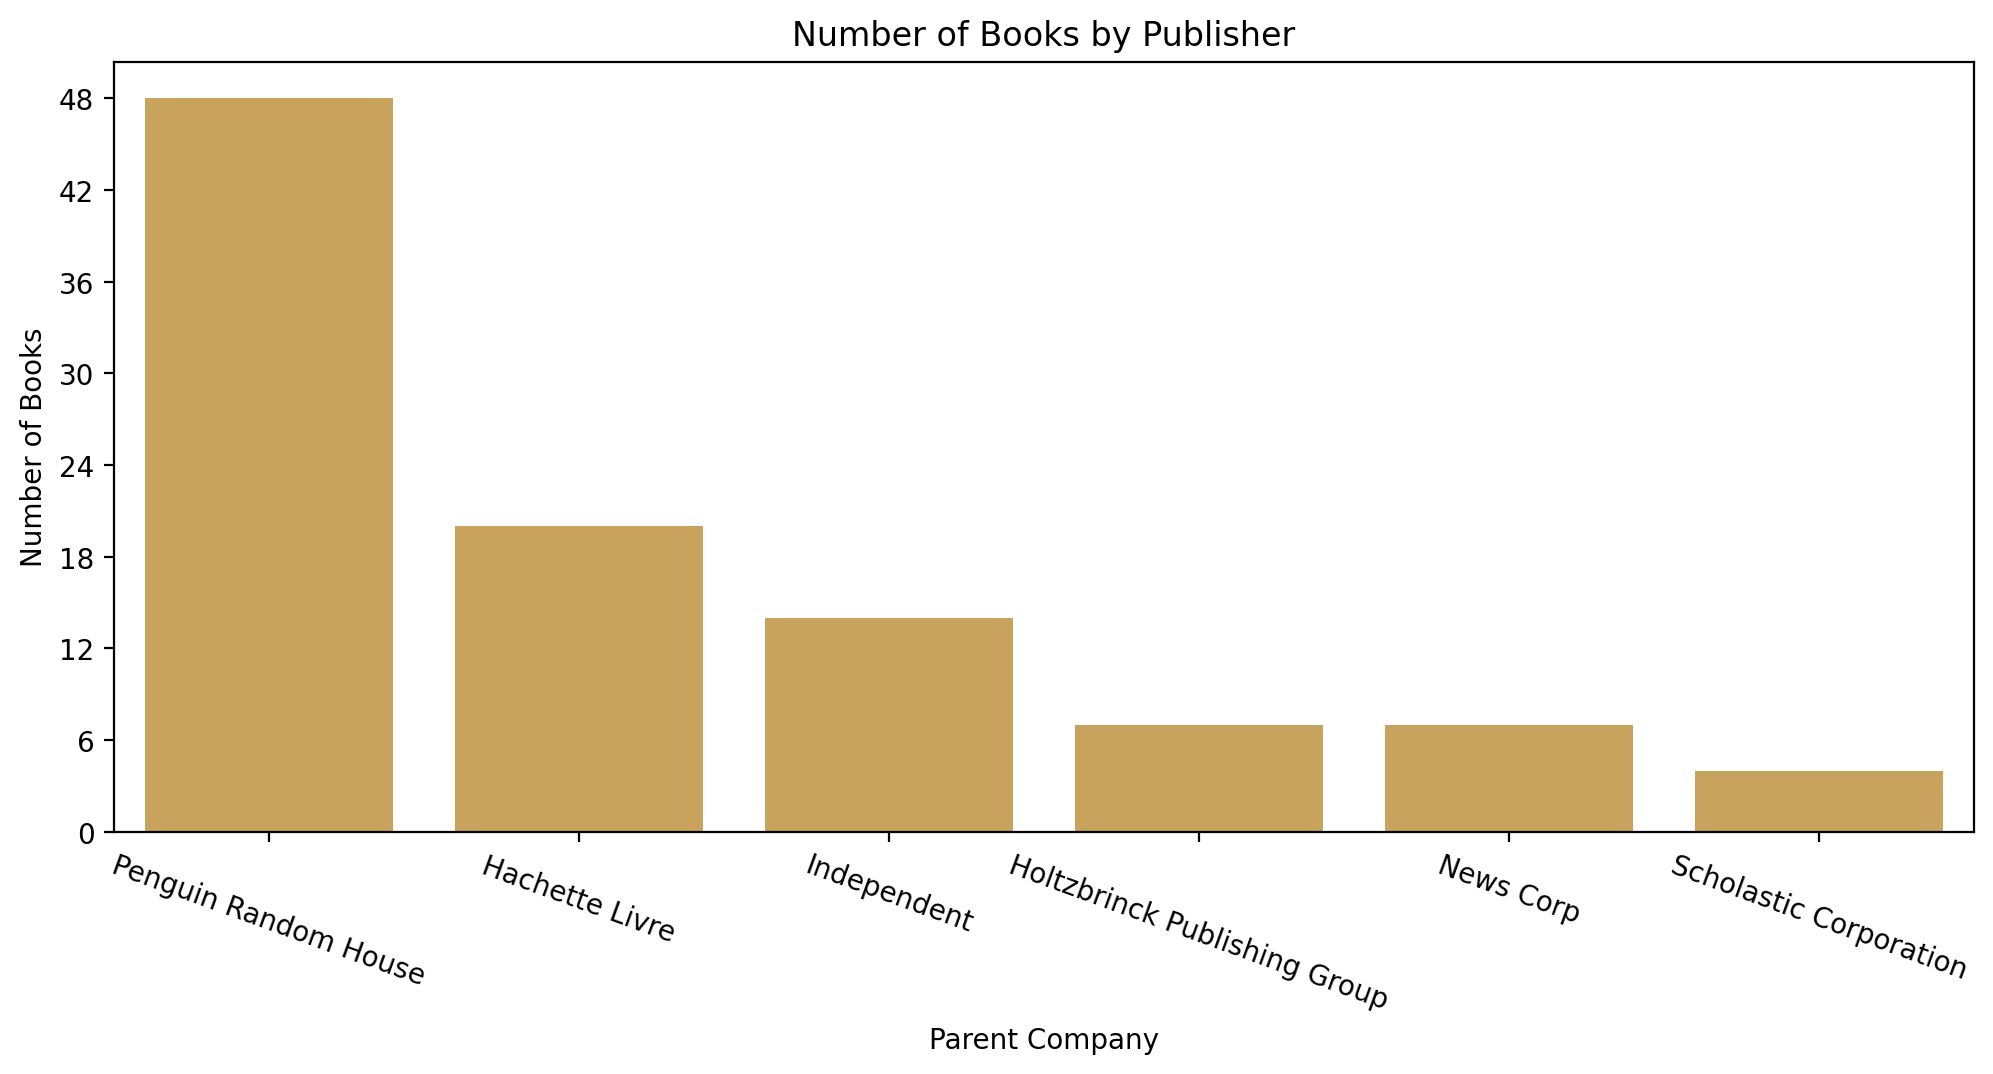

In [124]:
plt.figure(figsize = (12,5), dpi = 200)
sns.set_palette(classic_palette)

# Get the number of books by each publishers
publisher_counts = books.parent_company.value_counts().sort_values(ascending = False).reset_index()
publisher_counts.columns = ['company', 'num_of_books']

# Plot bar graph with the number of books each publisher has in top 100
axbar = sns.barplot(data = publisher_counts, x = 'company', y = 'num_of_books', color = classic_palette[2])
axbar.set(title = 'Number of Books by Publisher', xlabel = 'Parent Company', ylabel = 'Number of Books')
plt.xticks(rotation = -20)
axbar.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

### What are the most popular genres?

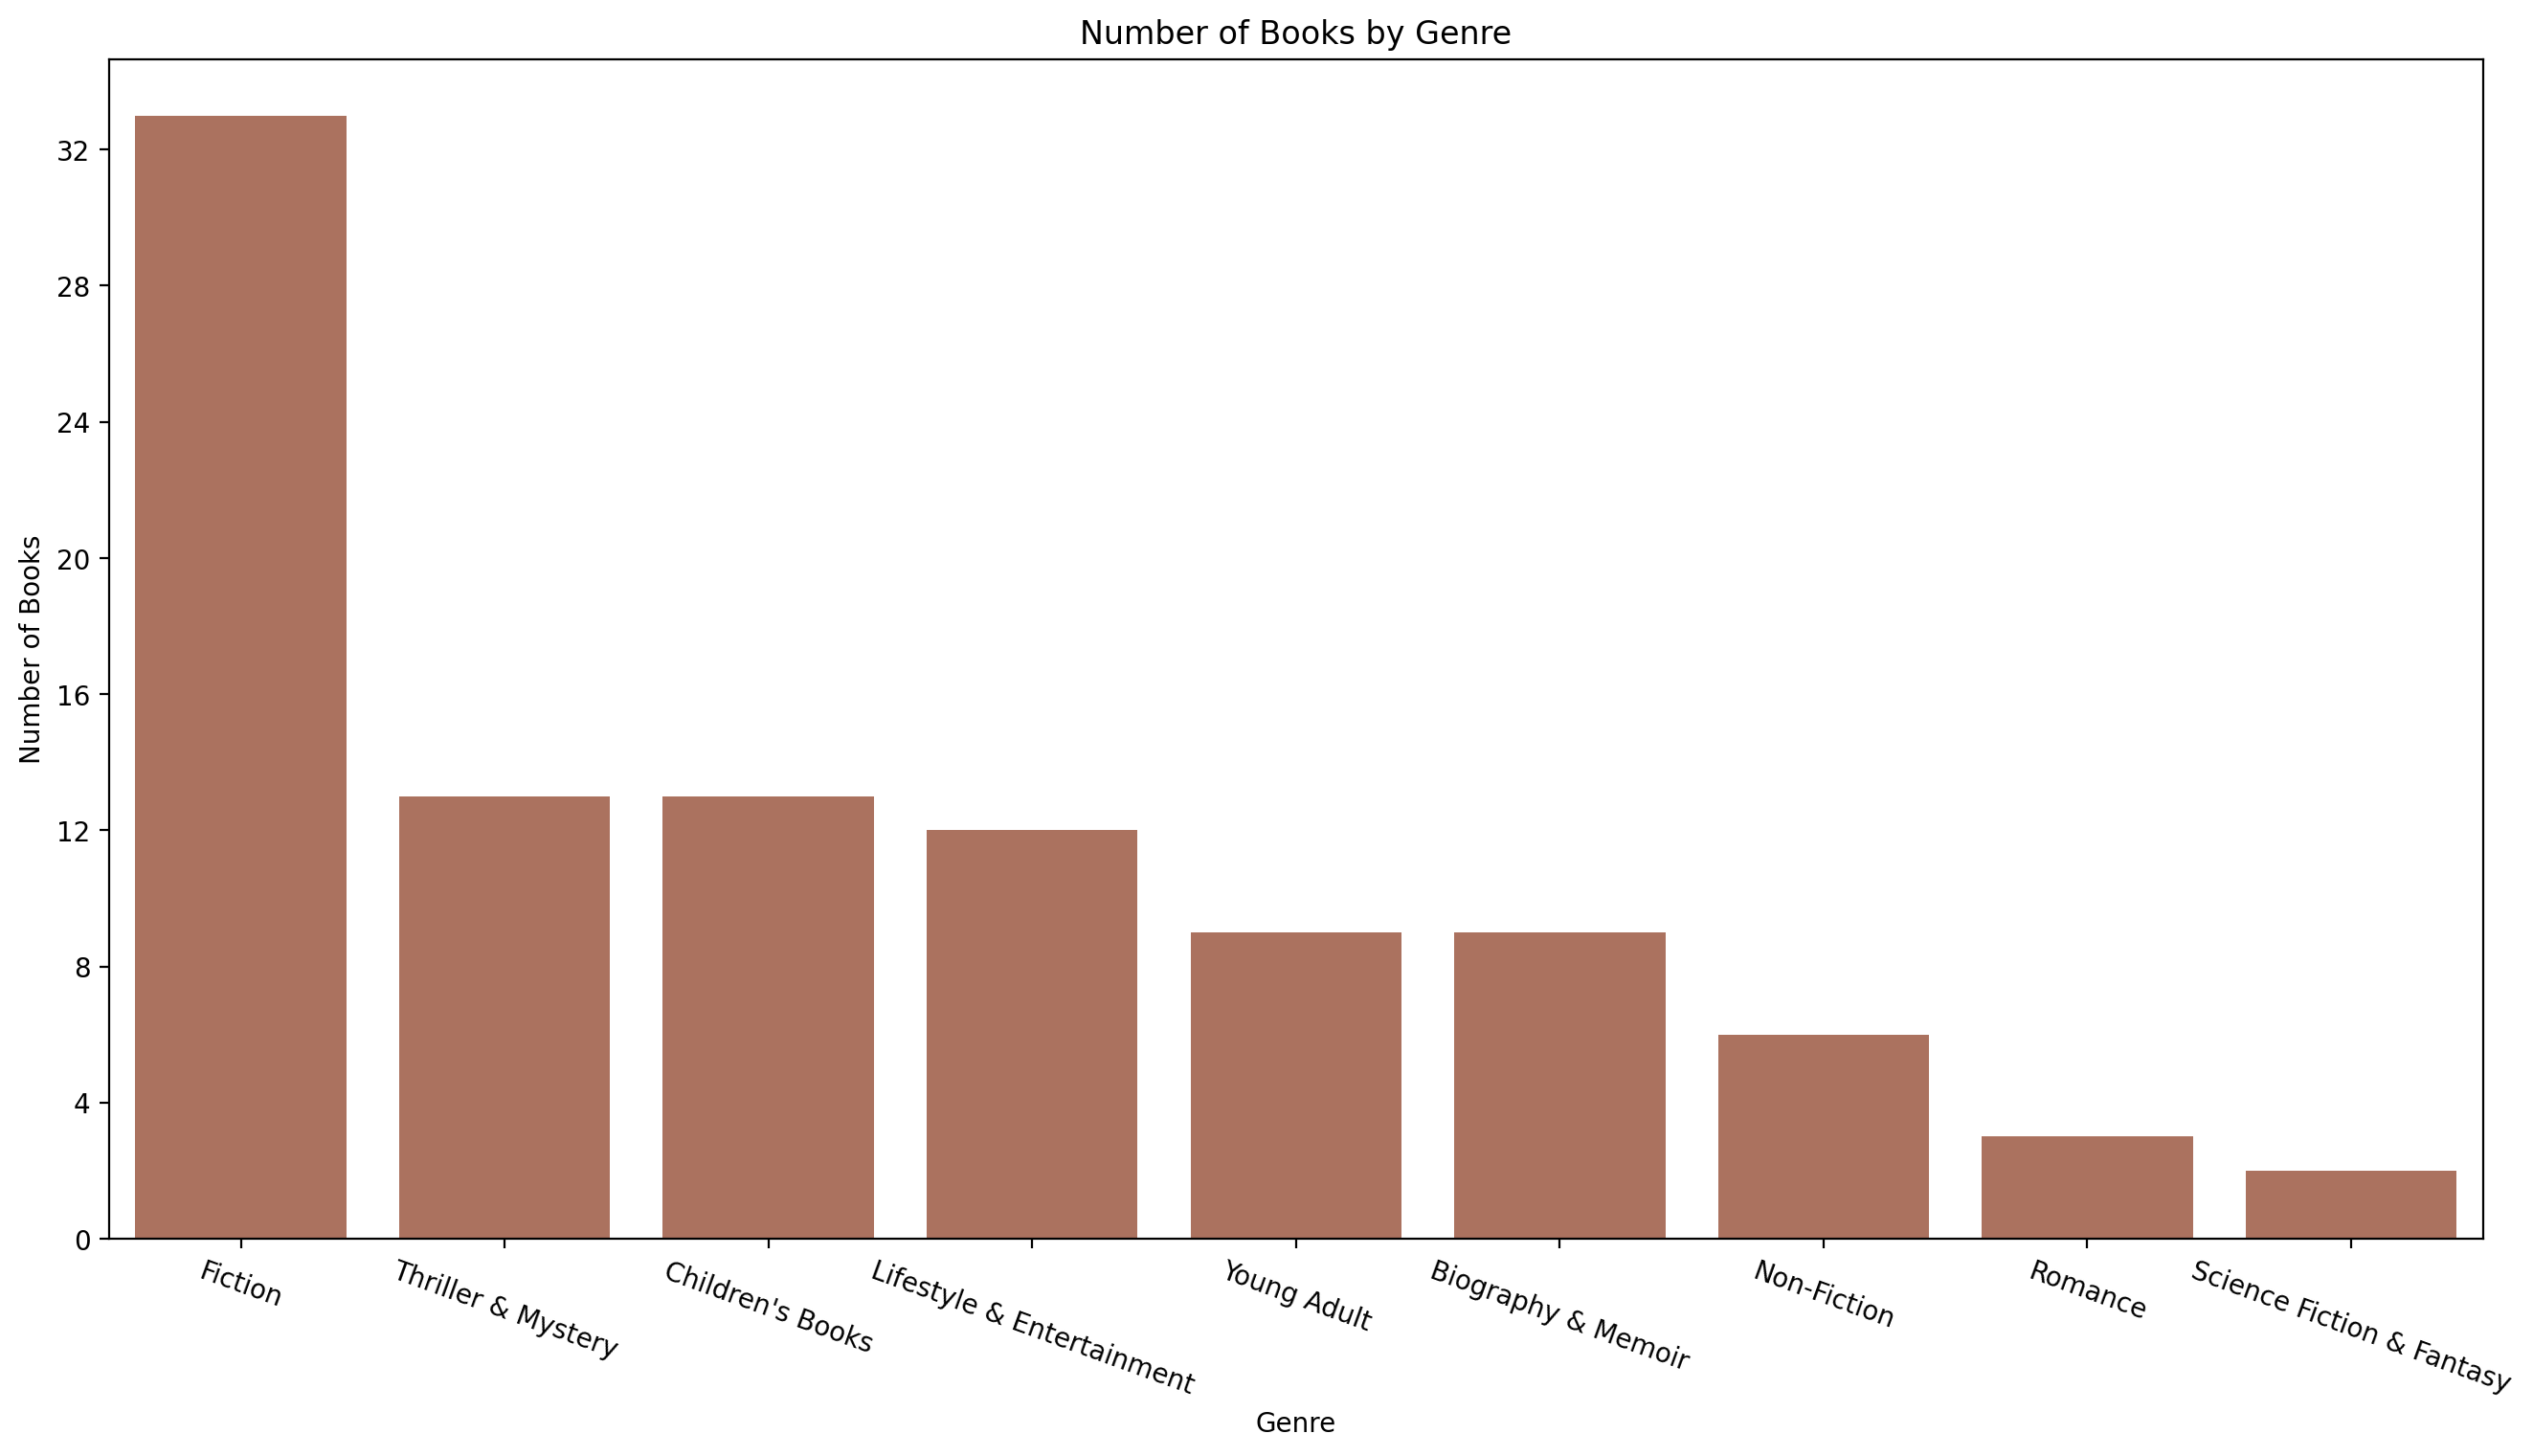

In [159]:
plt.figure(figsize = (16,8), dpi = 200)
sns.set_palette(classic_palette)

# Get the number of books for each genre group
genre_counts = books.general_genre.value_counts().sort_values(ascending = False).reset_index()
genre_counts.columns = ['genre', 'num_of_books']

# Plot a bar graph with the number of books each genre has in top 100
axbar = sns.barplot(data = genre_counts, x = 'genre', y = 'num_of_books', color = classic_palette[1])
axbar.set(title = 'Number of Books by Genre', xlabel = 'Genre', ylabel = 'Number of Books')
plt.xticks(rotation = -20) 
axbar.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

### Do some genres tend to sell more copies on average than others?

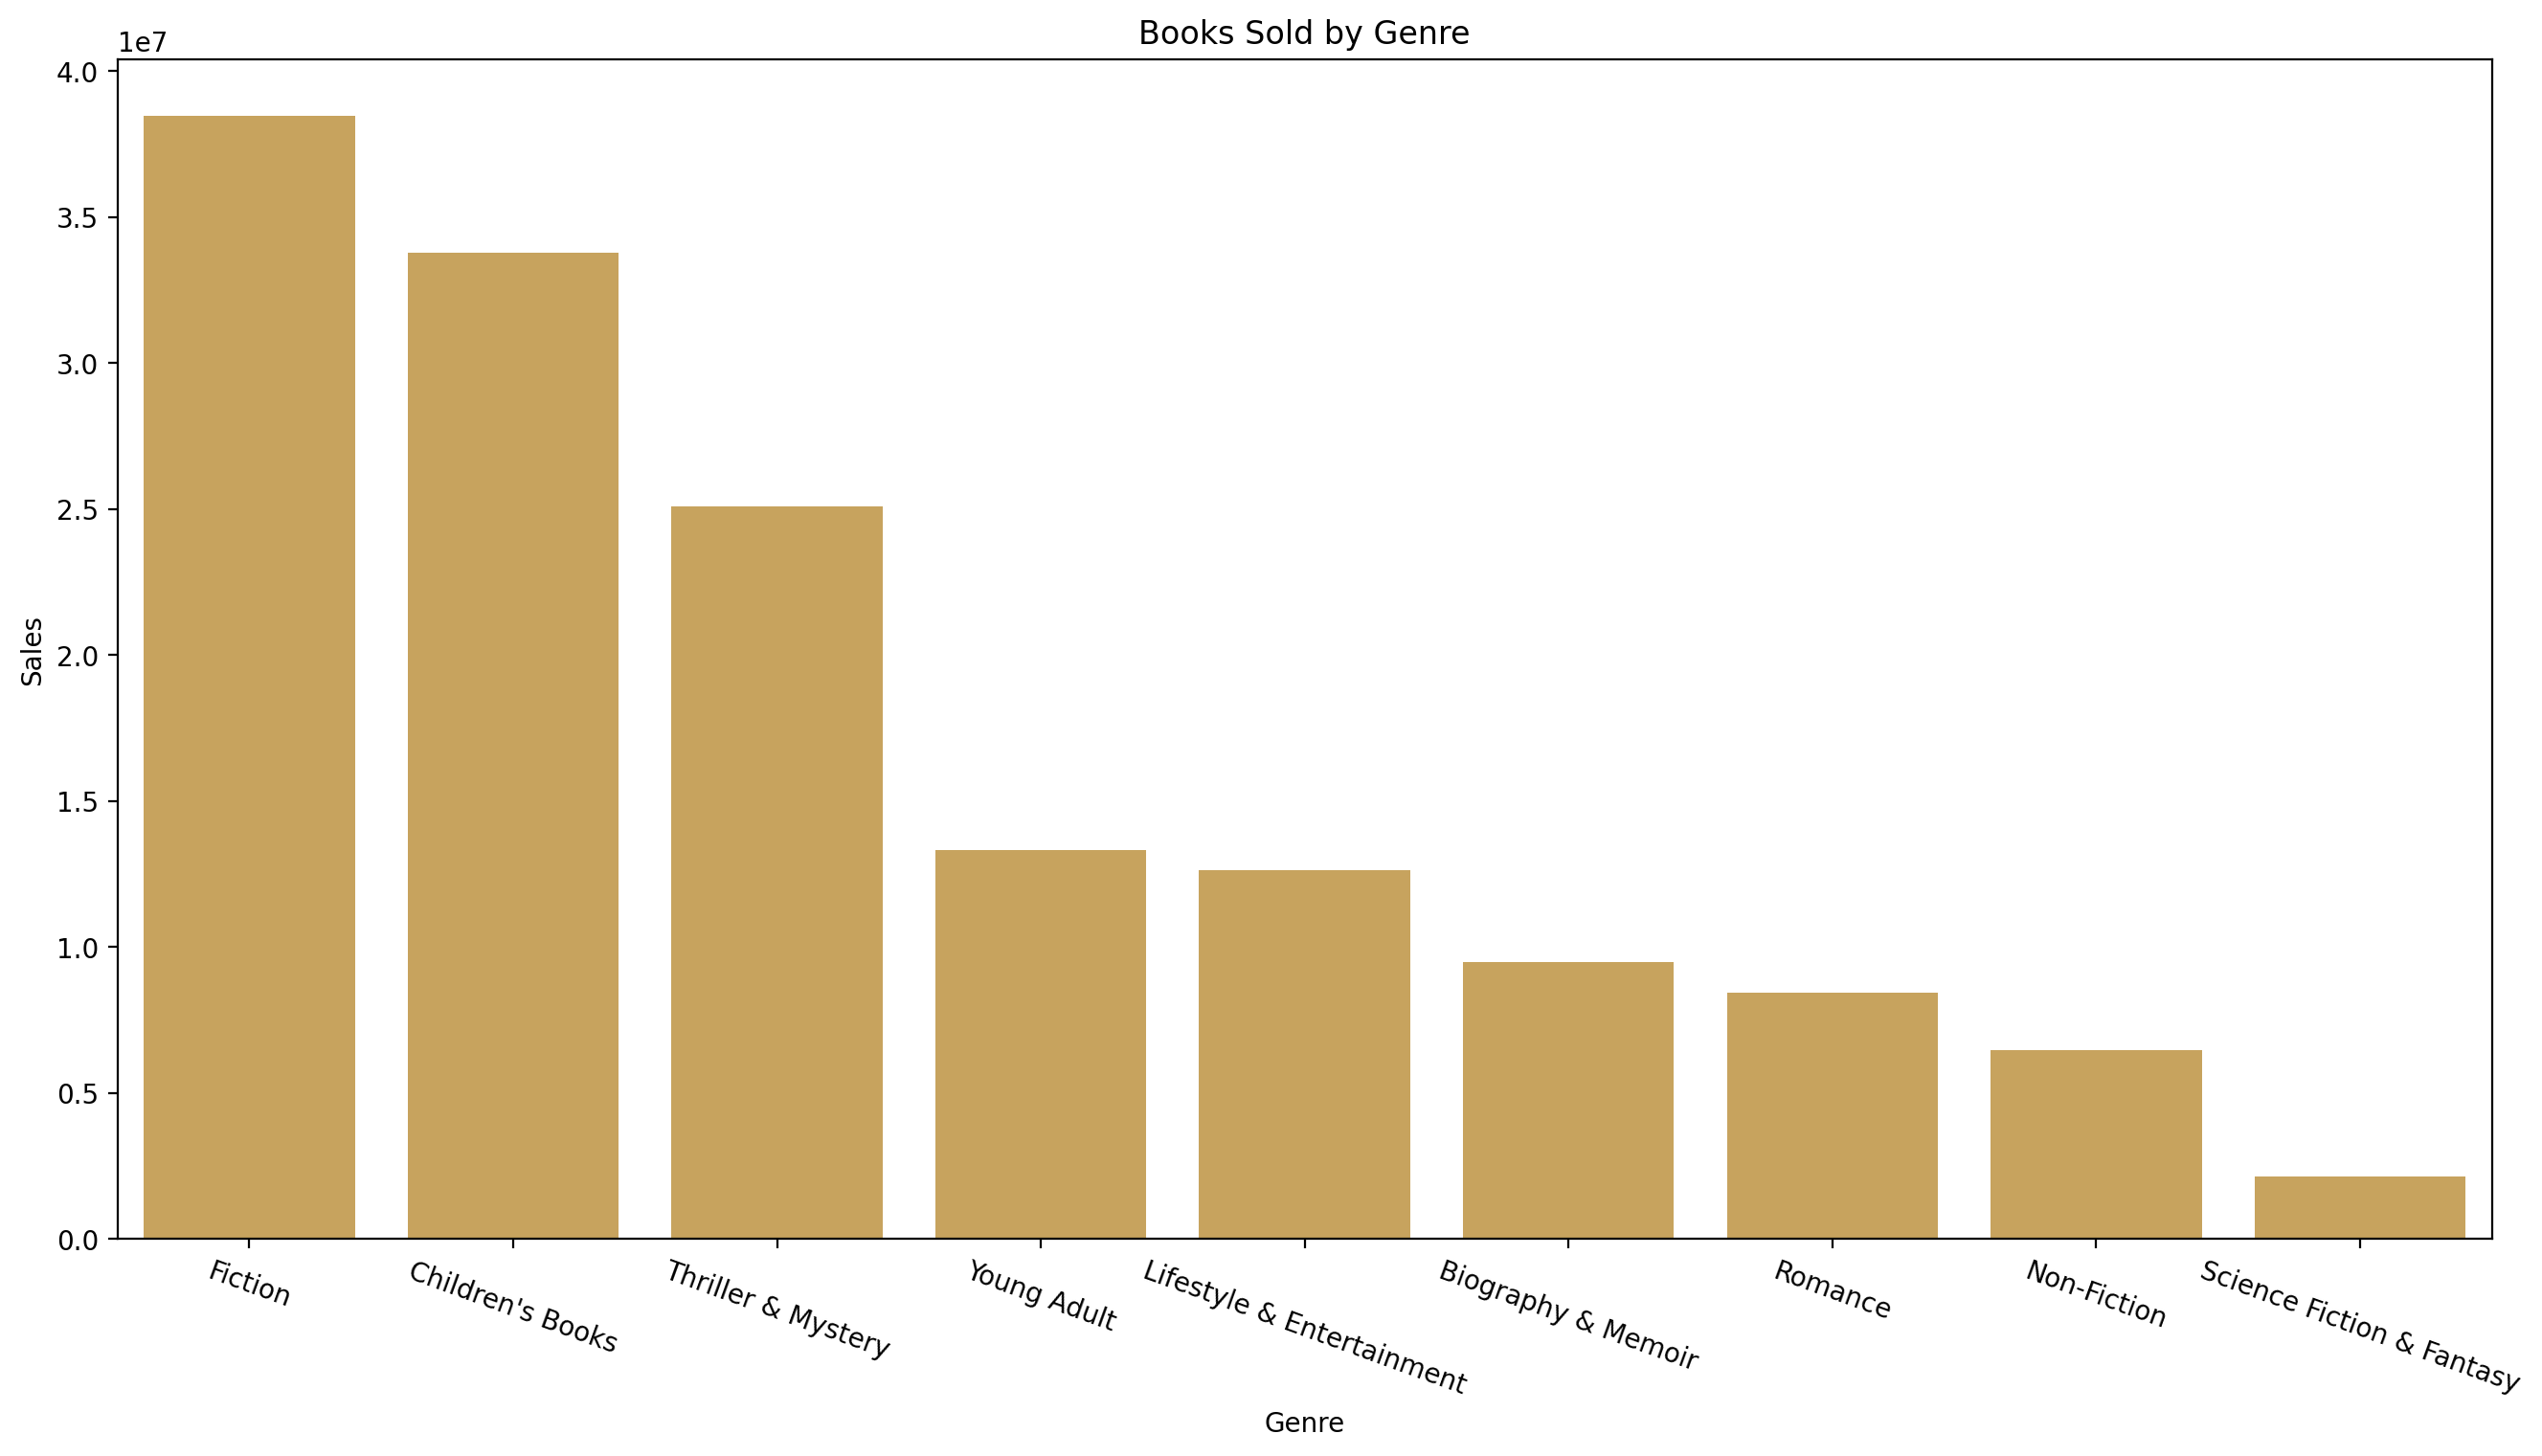

In [162]:
plt.figure(figsize = (16,8), dpi = 200)
sns.set_palette(classic_palette)

# Get the number of books for each genre group
genre_sales = books.groupby('general_genre').volume_sales.sum().sort_values(ascending = False).reset_index()
genre_sales.columns = ['genre', 'sales']

# Plot a bar graph with the number of books each genre has in top 100
axbar = sns.barplot(data = genre_sales, x = 'genre', y = 'sales', color = classic_palette[2])
axbar.set(title = 'Books Sold by Genre', xlabel = 'Genre', ylabel = 'Sales')
plt.xticks(rotation = -20) 
axbar.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Penguin Random House'),
  Text(1, 0, 'Independent'),
  Text(2, 0, 'Hachette Livre'),
  Text(3, 0, 'Holtzbrinck Publishing Group'),
  Text(4, 0, 'News Corp'),
  Text(5, 0, 'Scholastic Corporation')])

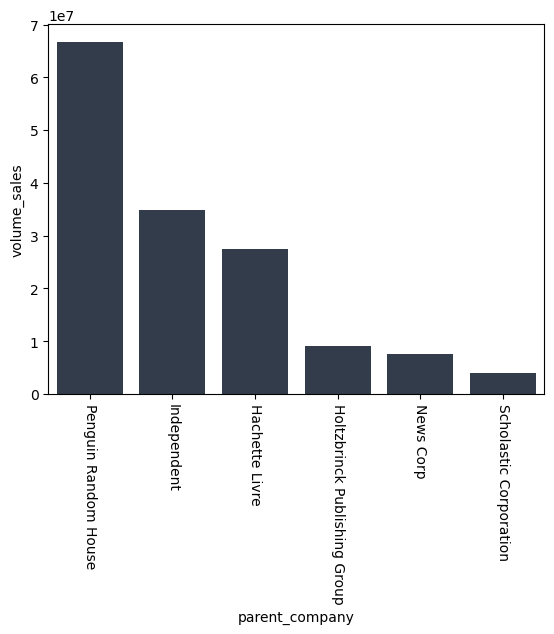

In [129]:
publisher_sales = books.groupby('parent_company').volume_sales.sum().sort_values(ascending = False).reset_index()

sns.barplot(data = publisher_sales, x = 'parent_company', y = 'volume_sales')
plt.xticks(rotation = -90)